In [ ]:
from google.colab import drive
import os
import zipfile
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/DM/Dataset.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
len(os.listdir('/tmp/Dataset/'))

1

In [ ]:
c1 = pd.read_csv("/tmp/Dataset/Mall_Customers.csv")

In [ ]:
print("Original 'Mall_Customers.csv: '")
print(c1)

Original 'Mall_Customers.csv: '
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [ ]:
c1.drop('Genre', inplace=True, axis=1)
c1.drop('Age', inplace=True, axis=1)
c1.drop('CustomerID', inplace=True, axis=1)
print(c1)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [ ]:
c1 = c1.rename(columns={"Annual Income (k$)": "x0", "Spending Score (1-100)": "x1"})

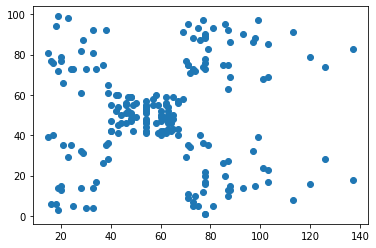

In [ ]:
plt.scatter(c1['x0'],c1['x1'])

In [ ]:
def single_distance(clusters ,cluster_num):
    print('First cluster | ','Second cluster | ', 'Distance')
    while len(clusters) is not cluster_num:
        closest_distance=clust_1=clust_2 = math.inf
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]):
            for point_id,point in enumerate(cluster):
                for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]):
                    for point2_id, point2 in enumerate(cluster2):
                        if distance.euclidean(point,point2) < closest_distance:
                            closest_distance = distance.euclidean(point,point2)
                            clust_1 = cluster_id
                            clust_2 = cluster2_id+cluster_id+1
        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2])
        clusters.pop(clust_2)
    return(clusters)

In [ ]:
### Hierarchical clustering
def hierarchical(data, cluster_num, metric = 'single'):
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x0'], row['x1']]])
    if metric is 'single':
        return single_distance(init_clusters, cluster_num)

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-12-5fa42095c3b4>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if metric is 'single':


First cluster |  Second cluster |  Distance
48  |  49  |  0.0
64  |  67  |  0.0
127  |  129  |  0.0
153  |  155  |  0.0
21  |  23  |  1.0
49  |  51  |  1.0
57  |  58  |  1.0
59  |  61  |  1.0
60  |  61  |  1.0
61  |  62  |  1.0
66  |  69  |  1.0
66  |  76  |  1.0
67  |  68  |  1.0
67  |  71  |  1.0
67  |  68  |  1.0
67  |  69  |  1.0
68  |  69  |  1.0
77  |  82  |  1.0
77  |  83  |  1.0
79  |  82  |  1.0
79  |  87  |  1.0
79  |  82  |  1.0
82  |  89  |  1.0
84  |  85  |  1.0
86  |  91  |  1.0
96  |  97  |  1.0
124  |  130  |  1.0
124  |  126  |  1.0
125  |  128  |  1.0
141  |  145  |  1.0
3  |  5  |  1.4142135623730951
9  |  11  |  1.4142135623730951
9  |  12  |  1.4142135623730951
22  |  24  |  1.4142135623730951
35  |  37  |  1.4142135623730951
46  |  49  |  1.4142135623730951
49  |  52  |  1.4142135623730951
49  |  53  |  1.4142135623730951
54  |  57  |  1.4142135623730951
67  |  69  |  1.4142135623730951
67  |  69  |  1.4142135623730951
67  |  76  |  1.4142135623730951
67  |  78  |

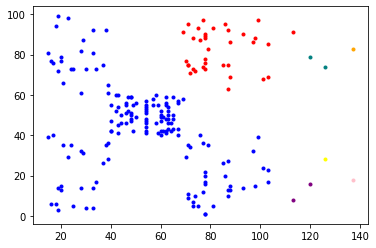

In [ ]:
clusters = hierarchical(c1,7)
colors = ['blue', 'red', 'purple', 'teal', 'yellow', 'pink', 'orange']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

In [ ]:
X = c1.values
# generate the linkage matrix
single_link = linkage(X, 'single') # using single link metric to evaluate 'distance' between clusters

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [ ]:
c, coph_dists = cophenet(single_link, pdist(X))
c

0.7230703278062255

In [ ]:
single_link[0]

array([48., 49.,  0.,  2.])

In [ ]:
single_link[:20]

array([[ 48.,  49.,   0.,   2.],
       [ 65.,  68.,   0.,   2.],
       [156., 158.,   0.,   2.],
       [129., 131.,   0.,   2.],
       [ 67.,  69.,   1.,   2.],
       [ 64.,  66.,   1.,   2.],
       [ 60.,  61.,   1.,   2.],
       [ 63., 201.,   1.,   3.],
       [ 51.,  53.,   1.,   2.],
       [ 74.,  77.,   1.,   2.],
       [ 85., 209.,   1.,   3.],
       [ 79.,  82.,   1.,   2.],
       [ 78.,  80.,   1.,   2.],
       [ 76., 212.,   1.,   3.],
       [ 75., 213.,   1.,   4.],
       [ 81., 214.,   1.,   5.],
       [103., 104.,   1.,   2.],
       [101., 109.,   1.,   2.],
       [ 92.,  99.,   1.,   2.],
       [ 97., 218.,   1.,   3.]])

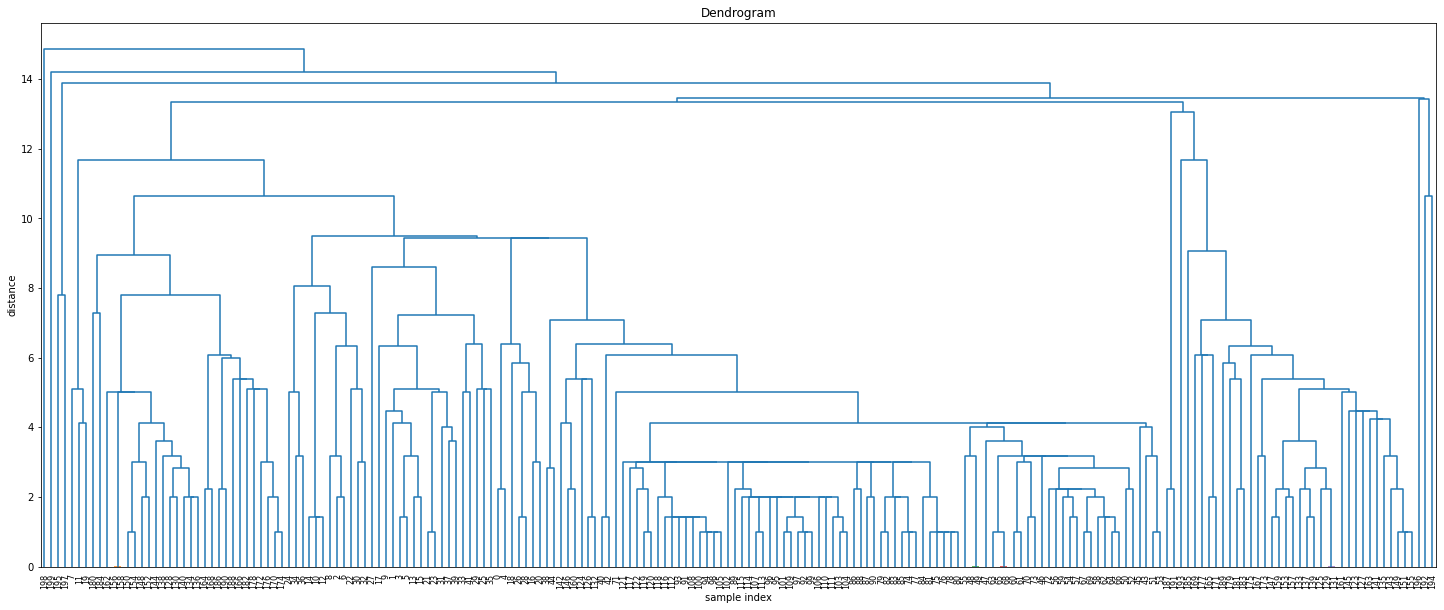

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    single_link,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold= .6
)
plt.show()

First cluster |  Second cluster |  Distance
48  |  49  |  0.0
64  |  67  |  0.0
127  |  129  |  0.0
153  |  155  |  0.0
21  |  23  |  1.0
49  |  51  |  1.0
57  |  58  |  1.0
59  |  61  |  1.0
60  |  61  |  1.0
61  |  62  |  1.0
66  |  69  |  1.0
66  |  76  |  1.0
67  |  68  |  1.0
67  |  71  |  1.0
67  |  68  |  1.0
67  |  69  |  1.0
68  |  69  |  1.0
77  |  82  |  1.0
77  |  83  |  1.0
79  |  82  |  1.0
79  |  87  |  1.0
79  |  82  |  1.0
82  |  89  |  1.0
84  |  85  |  1.0
86  |  91  |  1.0
96  |  97  |  1.0
124  |  130  |  1.0
124  |  126  |  1.0
125  |  128  |  1.0
141  |  145  |  1.0
3  |  5  |  1.4142135623730951
9  |  11  |  1.4142135623730951
9  |  12  |  1.4142135623730951
22  |  24  |  1.4142135623730951
35  |  37  |  1.4142135623730951
46  |  49  |  1.4142135623730951
49  |  52  |  1.4142135623730951
49  |  53  |  1.4142135623730951
54  |  57  |  1.4142135623730951
67  |  69  |  1.4142135623730951
67  |  69  |  1.4142135623730951
67  |  76  |  1.4142135623730951
67  |  78  |

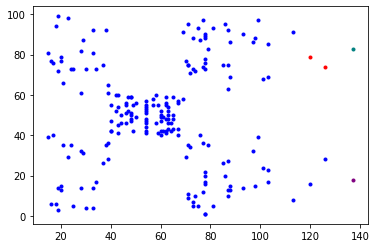

In [ ]:
clusters = hierarchical(c1,4)
colors = ['blue', 'red', 'purple', 'teal']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])